In [3]:
import numpy as np
import pickle

In [24]:
# datapath = './bertvsbert/data/poj/norm.pkl'
datapath = './bigJava/dataset.pkl'
train_path = './bigJava/train.pkl'
test_path = './bigJava/test.pkl'

In [23]:
with open(datapath, 'rb') as f:
    data = pickle.load(f)

In [27]:
len(data[0]['norm'])

185675

In [28]:
with open(train_path, 'wb') as f:
    pickle.dump(data[0], f)
with open(test_path, 'wb') as f:
    pickle.dump(data[1], f)

In [30]:
ls = [len(data['norm'][i]) for i in range(len(data['label']))]

In [32]:
print(min(ls))

24


In [33]:
def get_start_idxs(tokens, sub_tokens, bpe_indicator):
    starts = list(filter(lambda i: sub_tokens[i][0] == bpe_indicator, range(len(sub_tokens))))
    print(len(starts))

In [28]:
token = some[0]
subtoken = tok.tokenize(" ".join(some[0]))

In [35]:
get_start_idxs(token, subtoken, 'Ġ')
len(token)

293


294

In [1]:
import torch
from models.codebert import codebert_mlm, codebert_cls
import os
import utils
import pickle

In [2]:
device = torch.device("cpu")
model_path = "./save/java-classifier2/checkpoint-20000-0.9311"
cls_model = codebert_cls(model_path, device)

In [3]:
inputs = [
    "int main ( ) { int n , i ; n <= 11 ; return 0 }",
    # "int main ( ) { int <mask>, i ; <mask> = 1 ; return 0 }", 
    "void main ( ) { double x ; }",
]
inputs = [s.split() for s in inputs]

In [4]:
from scorer.base_scorer import SaliencyScorer
from scorer.gradient_scorer import  GradientSaliency

In [5]:
from utils import gen_score_img

In [6]:
cls_model.run_info(inputs)['predicted_labels'][0]

tensor(1)

In [7]:
scorer = GradientSaliency(cls_model)
attentions = scorer(inputs)

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 10, 10, 10, 10, 10]])
tensor([[ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10]])
torch.Size([2, 19])


In [8]:
import pickle
data_path = '../bigJava/datasets/test.pkl'

i = 29
with open(data_path, 'rb') as f:
    test_data = pickle.load(f)
inputs = [test_data['norm'][i]]
label = test_data['label'][i]
span = test_data['span'][i]
predicted_label = int(cls_model.run_info(inputs)['predicted_labels'][0])

In [9]:
with open("wrong.pkl", "wb") as f:
    pickle.dump((inputs, label, span), f)

In [10]:
attentions = scorer(inputs)
l = min(len(inputs[0]), len(attentions[0]))

tensor([[  1,   2,   4,   5,   6,  11,  12,  15,  16,  17,  18,  19,  20,  25,
          26,  27,  28,  29,  30,  31,  35,  36,  37,  38,  39,  41,  42,  43,
          44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  55,  56,  59,  60,
          68,  69,  70,  71,  72,  74,  75,  78,  79,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
         107, 108, 111, 112, 120, 121, 122, 123, 124, 126, 127, 130, 131, 139,
         140, 141, 142, 143, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
         171, 172, 173, 175, 176, 179, 180, 188, 189, 190, 191, 192, 194, 195,
         198, 199, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219,
         223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237,
         241, 242, 243, 244, 245, 246, 247, 251, 252, 253, 254, 255, 256, 257,
         258, 259, 260, 261, 264, 265, 266, 267, 268

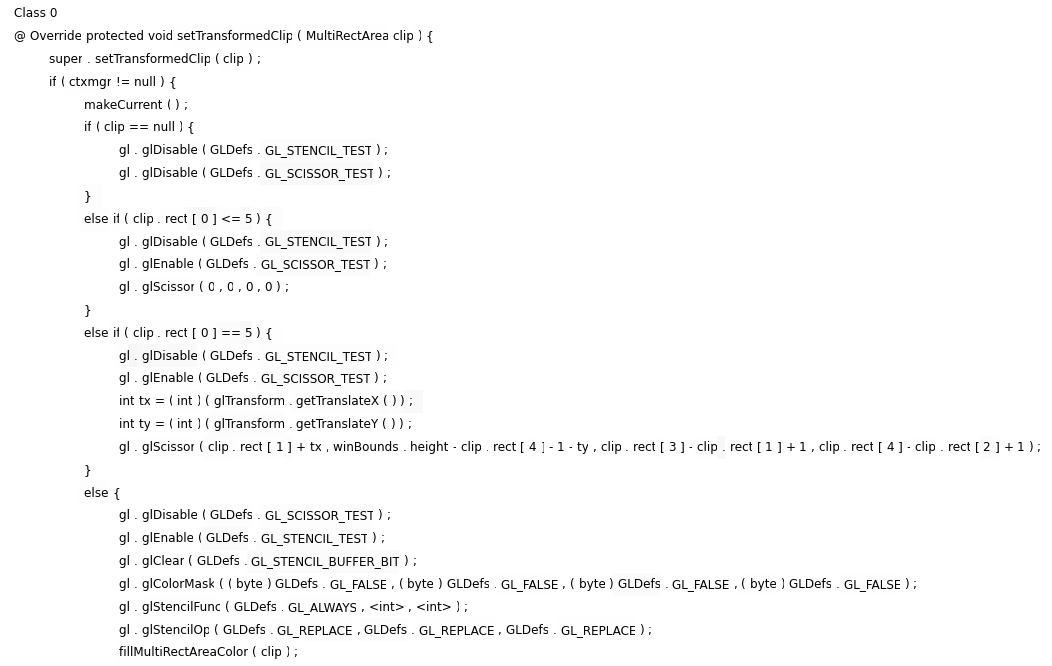

In [14]:
gen_score_img(inputs[0][:l], attentions[0][:l], 0)

In [33]:
import torch
from models.codebert import codebert_cls
from scorer.base_scorer import SaliencyScorer
from scorer.gradient_scorer import GradientSaliency

import pickle
from utils import gen_score_img

In [15]:
model_path = "./save/java-classifier4/checkpoint-36000-0.9365"
data_path = '../bigJava/datasets/test.pkl'

with open(data_path, 'rb') as f:
    test_data = pickle.load(f)
device = torch.device("cpu")
cls_model = codebert_cls(model_path, device)
scorer = SaliencyScorer(cls_model)

In [24]:
a = torch.zeros((2, 3))

In [29]:
inputs = [test_data['norm'][81]]

In [31]:
l = min(len(inputs[0]), len(attentions[0]))

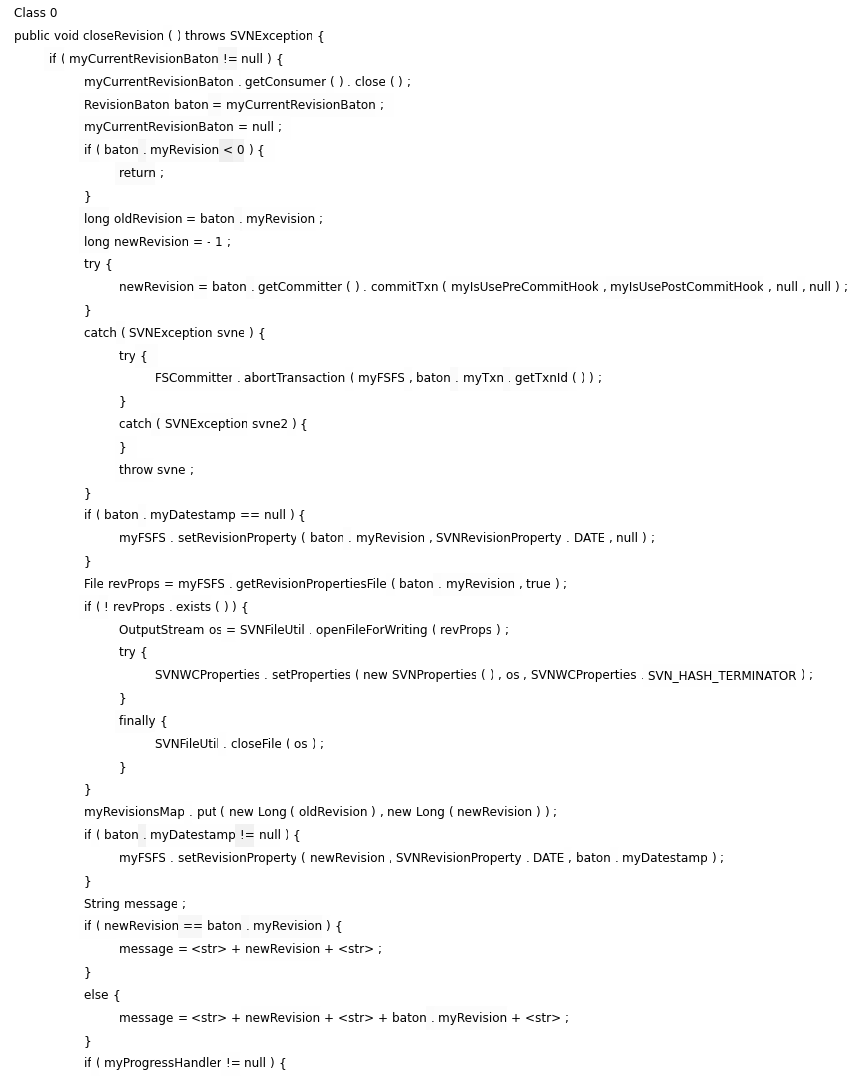

In [34]:
gen_score_img(inputs[0][:l], attentions[0][:l], 0)

In [17]:
attentions = scorer([test_data['norm'][81]])

In [21]:
len(attentions[0])

304